# KDDM Group 17


## 0: Package and df Import 

Importing and load necessary packages

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)

# For logistic regression
from sklearn.model_selection import train_test_split  # Split df into training set
from sklearn.linear_model import LogisticRegression # Using to predict category
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report


## 1: Data Understanding

#### Set directory and load data

In [2]:
# Reading the CSV file into a DataFrame
df = pd.read_csv('data_7.csv')

#### Overview and summary of the data

In [3]:
df.shape
#print(df.head())
#print(df.info())

# Summary Statistics
print(df.describe())

# Exportiert summary Tabelle
#summary_stats = df.describe()
#summary_stats.to_excel('summary_statistics.xlsx', index=True)


         Bedrooms   Bathrooms  SquareFootageHouse         Age  \
count  618.000000  630.000000          995.000000  868.000000   
mean     1.621359    1.658730          175.727638   43.324885   
std      0.941909    0.922796          821.254214   18.770587   
min      1.000000    1.000000         -895.000000  -94.000000   
25%      1.000000    1.000000           53.000000   33.000000   
50%      1.000000    1.000000           86.000000   45.000000   
75%      2.000000    2.000000          116.000000   57.000000   
max      5.000000    5.000000         8578.000000   71.000000   

       SquareFootageGarden  PreviousOwnerRating  HeatingCosts        Price  
count           995.000000           995.000000    516.000000   995.000000  
mean             11.538693             2.576905    125.134496   253.826843  
std               7.898836             0.894898    507.796163   428.592868  
min               6.000000             1.000000   -443.000000    29.123820  
25%               6.000000   

## 2: Data Preparation

#### How are the NA's distributed?

In [4]:
# Handling Missing Values
#print(df.isna().sum())

#Drop na (HeatingType), removes the 5 missing values across all values
df = df.dropna(how='all').copy()
#print(df.isna().sum())
#print(df.head())

#Remove all missing data
# !! Not for Pool
#df = df.dropna().copy()
missing_values_count = df.isna().sum()
print("Missing values count for each column:")
print(missing_values_count)

Missing values count for each column:
Bedrooms               377
Bathrooms              365
SquareFootageHouse       0
Location               194
Age                    127
PoolQuality            643
HasPhotovoltaics        79
HeatingType              0
HasFiberglass            0
IsFurnished              0
DateSinceForSale         0
HouseColor               8
PreviousOwnerName      146
HasFireplace             0
KitchensQuality          0
BathroomsQuality         0
BedroomsQuality          0
LivingRoomsQuality       0
SquareFootageGarden      0
PreviousOwnerRating      0
HeatingCosts           479
WindowModelNames         0
Price                    0
dtype: int64


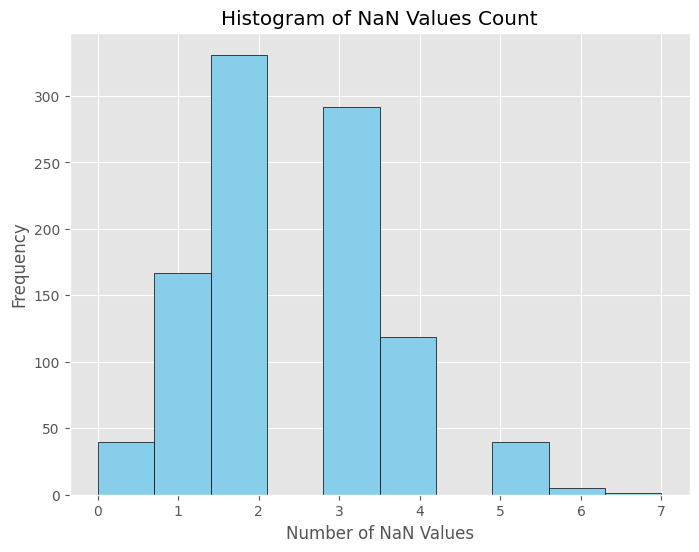

In [5]:

# Create column counting NA's
df['NaCount'] = df.isna().sum(axis=1)


# Plot a histogram for the 'NaCount' column
plt.figure(figsize=(8, 6))
plt.hist(df['NaCount'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Number of NaN Values')
plt.ylabel('Frequency')
plt.title('Histogram of NaN Values Count')
plt.grid(True)
plt.show()


In [6]:
df.shape

(995, 24)

#### Data type transformation

In [7]:
# Location
# There are 4 instead of 3 categories:
# ['Rural', 'Suburban', 'Suburbann', 'Urban'] 
# The typo will be corrected and the data summarized
df['Location'].replace('Suburbann', 'Suburban', inplace=True)
pd.Categorical(df['Location'])

# Heating Type
# There are 5 instead of 3 categories:
# ['Electric', 'Electricity', 'Gas', 'Oil', 'Oil Heating'] 
# The data will be summarized
# ['Electric', 'Gas', 'Oil']
df['HeatingType'].replace('Electricity', 'Electric', inplace=True)
df['HeatingType'].replace('Oil Heating', 'Oil', inplace=True)
pd.Categorical(df['HeatingType'])

['Gas', 'Electric', 'Gas', 'Electric', 'Oil', ..., 'Gas', 'Oil', 'Oil', 'Electric', 'Electric']
Length: 995
Categories (3, object): ['Electric', 'Gas', 'Oil']

#### Test for categories

In [8]:
# Pool Quality
# 3 categories:
# ['Excellent', 'Good', 'Poor']
pd.Categorical(df['PoolQuality'])

# Has Photovoltaics 
# Bool
# [False, True]
pd.Categorical(df['HasPhotovoltaics'])

# Heating Type 
# 3 categories:
# ['Excellent', 'Good', 'Poor']
pd.Categorical(df['HeatingType'])

# Has Fiberglass
# Bool
# [False, True]
pd.Categorical(df['HasFiberglass'])

# Is Furnished
# Bool
# [False, True]
pd.Categorical(df['IsFurnished'])

# House Color 
# 4 categories:
# ['Gray', 'Green', 'White', 'Yellow']
pd.Categorical(df['HouseColor'])

# Has Fireplace 
# Bool
# [False, True]
pd.Categorical(df['HasFireplace'])

# Kitchens Quality 
# 3 categories:
# ['Excellent', 'Good', 'Poor']
pd.Categorical(df['KitchensQuality'])

# Bathrooms Quality 
# 3 categories:
# ['Excellent', 'Good', 'Poor']
pd.Categorical(df['BathroomsQuality'])

# Bedrooms Quality 
# 3 categories:
# ['Excellent', 'Good', 'Poor']
pd.Categorical(df['BedroomsQuality'])

# Livingrooms Quality 
# 3 categories:
# ['Excellent', 'Good', 'Poor']
pd.Categorical(df['LivingRoomsQuality'])

# Previous Ownder Rating
# 1.00 to 4.97
# [1.00, 1.01, 1.02, 1.03, ..., 4.93, 4.94, 4.96, 4.97]
pd.Categorical(df['PreviousOwnerRating'])

# Window Model Names
# Way too many categories
# 995
# Each house has its own category (No duplicates)
pd.Categorical(df['WindowModelNames'])
print(len(df['WindowModelNames']))
duplicates_mask = df['WindowModelNames'].duplicated()
duplicates_df = df[duplicates_mask]
print("Duplicate rows:")
print(duplicates_df)

995
Duplicate rows:
Empty DataFrame
Columns: [Bedrooms, Bathrooms, SquareFootageHouse, Location, Age, PoolQuality, HasPhotovoltaics, HeatingType, HasFiberglass, IsFurnished, DateSinceForSale, HouseColor, PreviousOwnerName, HasFireplace, KitchensQuality, BathroomsQuality, BedroomsQuality, LivingRoomsQuality, SquareFootageGarden, PreviousOwnerRating, HeatingCosts, WindowModelNames, Price, NaCount]
Index: []


#### Test for duplicates

In [9]:
df.loc[df.duplicated()]
# No duplicate rows 

,Bedrooms,Bathrooms,SquareFootageHouse,Location,Age,PoolQuality,HasPhotovoltaics,HeatingType,HasFiberglass,IsFurnished,DateSinceForSale,HouseColor,PreviousOwnerName,HasFireplace,KitchensQuality,BathroomsQuality,BedroomsQuality,LivingRoomsQuality,SquareFootageGarden,PreviousOwnerRating,HeatingCosts,WindowModelNames,Price,NaCount


#### Output of all cases with SquareFootageHouse <0

In [ ]:
# Count the cases where 'SquareFootageHouse       ' is smaller than 0
negative_square_footage_house_count = (df['SquareFootageHouse'] < 0).sum()

# Display the count
print("Number of cases where SquareFootageHouse is smaller than 0:", negative_square_footage_house_count)

# Filter the DataFrame to get rows where 'SquareFootageHouse' is smaller than 0
negative_square_footage_house_cases = df[df['SquareFootageHouse'] < 0]
# Print the cases where 'SquareFootageHouse       ' is smaller than 0
print("Cases where SquareFootageHouse  is smaller than 0:")
print(negative_square_footage_house_cases)

# There are 8 cases
# I would suggest to simply make them positive (Could be just a typo)


# Correcting negative values in the SquareFootageHouse column # Paul
df.loc[df['SquareFootageHouse'] < 0, 'SquareFootageHouse'] = df['SquareFootageHouse'] * -1
print(f"Remaining number of houses with negative Square Footage: {(df['SquareFootageHouse'] < 0).sum()}")

#### Output of all cases with Age <0

In [ ]:
# Count the cases where 'Age' is smaller than 0
negative_age_house_count = (df['Age'] < 0).sum()
# Display the count
print("Number of cases where Age is smaller than 0:", negative_age_house_count)

# Filter the DataFrame to get rows where 'Age' is smaller than 0
negative_age_house_cases = df[df['Age'] < 0]
# Print the cases where 'Age' is smaller than 0
print("Cases where Age  is smaller than 0:")
print(negative_age_house_cases)

# There are 12 cases
# I would suggest to simply make them positive (Could be just a typo)
# Everything else seems okay

# Correcting negative values in the Age column  # Paul
df.loc[df['Age'] < 0, 'Age'] = df['Age'] * -1

print(f"Remaining number of houses with negative age: {(df['Age'] < 0).sum()}")


#### Output of all cases with HeatingCost <0

In [ ]:
# Count the cases where 'HeatingCost' is smaller than 0
negative_heating_cost_count = (df['HeatingCosts'] < 0).sum()
# Display the count
print("Number of cases where Age is smaller than 0:", negative_heating_cost_count)

# Filter the DataFrame to get rows where 'HeatingCost' is smaller than 0
negative_heating_cost_cases = df[df['HeatingCosts'] < 0]
# Print the cases where 'HeatingCost' is smaller than 0
print("Cases where HeatingCost  is smaller than 0:")
print(negative_heating_cost_cases)

# There are 5 cases 
# I would suggest to simply make them positive (Could be just a typo)
# Everything else seems okay # Nik

# Correcting negative values in the HeatingCosts column  # Paul
df.loc[df['HeatingCosts'] < 0, 'HeatingCosts'] = df['HeatingCosts'] * -1

print(f"Remaining number of houses with negative heating costs: {(df['HeatingCosts'] < 0).sum()}")

#### Comparison of Age and DateSinceForSale

In [ ]:
# Extracts the Year since the house is for sale
df['Year'] = df['DateSinceForSale'].str.extract(r'(\d{4})')
# Converting the 'Year' column to numeric # Paul
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Calculates the Year, the house was build in
df['NewAge'] =  2024 - df['Age'] 

# Subtracts Age the house was build in from the Year since sale, to look for anomalies
result = df[df['Year'] < df['NewAge']]
print(result)

# Shows no errors/anomalies in the code, expect the cases with negative Age 
# and houses that were build this year and were put up for sale

Calculating General Square Footage

In [14]:
#Overall Square Footage
# Negative Outliners need to be corrected first!
df['general_square_footage'] = df['SquareFootageHouse'] + df['SquareFootageGarden']
print(df['general_square_footage'].describe())


count     995.000000
mean      195.939698
std       819.625602
min        25.000000
25%        66.000000
50%        97.000000
75%       128.000000
max      8608.000000
Name: general_square_footage, dtype: float64


#### Recoding to numeric values 

Location

In [36]:
df['Location'].replace('Rural', '1', inplace=True)
df['Location'].replace('Suburban', '2', inplace=True)
df['Location'].replace('Urban', '3', inplace=True)
# ['Rural', 'Suburban', 'Suburbann', 'Urban'] 
df['Location_numeric'] = pd.to_numeric(df['Location'], errors='coerce')

Heating Types

In [38]:
df['HeatingType'].replace('Electric', '1', inplace=True)
df['HeatingType'].replace('Gas', '2', inplace=True)
df['HeatingType'].replace('Oil', '3', inplace=True)
df['HeatingType_numeric'] = pd.to_numeric(df['HeatingType'], errors='coerce')

Booleans to Numeric

In [45]:
# Convert custom strings to booleans
df['HasPhotovoltaics'] = df['HasPhotovoltaics'].astype(bool)
df['HasFiberglass'] = df['HasFiberglass'].astype(bool)
df['IsFurnished'] = df['IsFurnished'].astype(bool)
df['HasFireplace'] = df['HasFireplace'].astype(bool)

In [48]:
df['HasPhotovoltaics_numeric'] = df['HasPhotovoltaics'].astype(float)
df['HasFiberglass_numeric'] = df['HasFiberglass'].astype(float)
df['IsFurnished_numeric'] = df['IsFurnished'].astype(float)
df['HasFireplace_numeric'] = df['HasFireplace'].astype(float)

#### Calculating Room Count

In [15]:
# Overall Room Count 
# Negative Outliners need to be corrected first! 
df['Rooms'] = df['Bedrooms'] + df['Bathrooms'] 
#print(df['Rooms'].describe()) 
#df['Rooms'] 

#### Calculating Overall House Quality

In [20]:
# Overall House Quality
# Quality Categories need to be converted to numeric values
category_map = {'Excellent': 3, 'Good': 2, 'Poor': 1}

# Convert categorical values to numerical values
df["PoolQuality"] = df["PoolQuality"].replace(category_map)
df["KitchensQuality"] = df["KitchensQuality"].replace(category_map)
df["BathroomsQuality"] = df["BathroomsQuality"].replace(category_map)
df["BedroomsQuality"] = df["BedroomsQuality"].replace(category_map)
df["LivingRoomsQuality"] = df["LivingRoomsQuality"].replace(category_map)

# Calculate average score across columns
df["overall_quality"] = df["PoolQuality"] + df["KitchensQuality"] + df["BathroomsQuality"] + df["BedroomsQuality"] + df["LivingRoomsQuality"] 
#print(df["overall_quality"].describe())

# Count the number of non-missing values for each row
num_non_missing_values = df[["PoolQuality", "KitchensQuality", "BathroomsQuality", "BedroomsQuality", "LivingRoomsQuality"]].notnull().sum(axis=1)
#num_non_missing_values.describe()

# Calculate the average overall quality score
df["average_overall_quality"] = df["overall_quality"] / num_non_missing_values.replace(0, np.nan)  # Replace 0 with NaN to handle division by zero

# Print summary statistics of the average overall quality score
#print(df["average_overall_quality"].describe())

### Handling NA's

#### Creating variable 'HasPool' Assuming Houses with Pool Quality = NA don't have a pool

In [17]:
# Create a new column 'HasPool' based on the presence of 'PoolQuality'
df['HasPool'] = df['PoolQuality'].notna().astype(int)

#### 1: Try to predict NA's based off location

##### Difficulty: how to treat extreme values
-> for training the model, values below 3 SD are not included

In [18]:
# Identify outliers for Price and Squarefootage

# Calculate mean and standard deviation
price_mean = df['Price'].mean()
price_std = df['Price'].std()
square_feet_mean = df['SquareFootageHouse'].mean()
square_feet_std = df['SquareFootageHouse'].std()

# Define bounds for being within 3 standard deviations
price_upper_bound = price_mean + 3 * price_std
price_lower_bound = price_mean - 3 * price_std
square_feet_upper_bound = square_feet_mean + 3 * square_feet_std
square_feet_lower_bound = square_feet_mean - 3 * square_feet_std

# Filter data for outliers
extreme_prices = df[(df['Price'] > price_upper_bound) | (df['Price'] < price_lower_bound)]
extreme_square_feet = df[(df['SquareFootageHouse'] > square_feet_upper_bound) | 
                           (df['SquareFootageHouse'] < square_feet_lower_bound)]

# Print results
print("Extreme Prices:\n", extreme_prices[['Price', 'SquareFootageHouse']])
print("Extreme Square Feet:\n", extreme_square_feet[['Price', 'SquareFootageHouse']])

df_filtered_price_sf = df[
    (df['Price'] >= price_lower_bound) & (df['Price'] <= price_upper_bound) &
    (df['SquareFootageHouse'] >= square_feet_lower_bound) & 
    (df['SquareFootageHouse'] <= square_feet_upper_bound)
]


Extreme Prices:
          Price  SquareFootageHouse
13   3456.1926                74.0
114  3064.1810                66.0
244  2506.0022               112.0
419  5041.2354               136.0
439  6050.5916                76.0
458  2578.1786                41.0
561  3620.8370               108.0
566  4229.2804                48.0
604  3419.3726                77.0
625  4311.0886                79.0
698  1688.5490               106.0
814  2749.9452                91.0
877  2733.1256                81.0
906  2045.7770                66.0
935  3353.4360                61.0
970  2032.4594                28.0
Extreme Square Feet:
          Price  SquareFootageHouse
14    51.50734              5871.0
94   118.74909              6653.0
183  528.42211              8578.0
209  191.94354              6641.0
272  177.42720              8403.0
287  301.07468              6997.0
469  113.91137              5842.0
482   90.84932              5747.0
515  133.81882              8223.0
555  166.75554  

In [19]:

#defining independent and dependent variables
X = df[['SquareFootageHouse', 'Price']]
y = df['Location']

# Encoding the categorical data
encoder = OneHotEncoder(sparse=False)
y_encoded = encoder.fit_transform(y.values.reshape(-1, 1))
target_names = [str(name) for name in encoder.categories_[0]]  # Converting categories to strings immediately

# Splitting the dataset into training and testing sets: 20% for testing; 80% for training
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Convert one-hot encoded y_train and y_test back to label encoded
y_train_label = np.argmax(y_train, axis=1)
y_test_label = np.argmax(y_test, axis=1)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train_label)

# Predicting and evaluating the model
y_pred = model.predict(X_test)
print(classification_report(y_test_label, y_pred, target_names=target_names))

TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

#### Conclusion for location:
The prediction of location was not satisfying. We should not try to replace NA's with predictions.

Na's will be replaced by Median values

In [53]:
float_columns = df.select_dtypes(include=['float64']).columns
df_float = df[float_columns]
df_median = df_float.fillna(df_float.median())

In [57]:
df = df_median.copy()

## 3: